# Анализ качества бриллианта

Дата сет состоит из различных данных о бриллиантах со всего мира с заполненными характеристиками по каждому из них. 
- физические/геологические размерные характерискти - размеры бриллианта (x,y,z осям соответствующие, ширина, длинна, высота камня), а также количество карат, глубина и столешница бриллианта ( про два последних подробнее есть на картинке в репозитории)
- физические/геологические не размерные характеристики (ясность, цвет)
- характеристики зависящие от людей (качество его огранки)

Так же в датасете присутствует окончательная цена бриллианта, которую в данной задаче мы постараемся верно предсказать. 

Входные параметры:

* carat (Карат 0.2--5.01 значения)
* cut (Огранка, оценивается качество огранки)
    - Fair(плохое)
    - Good(хорошее)
    - Very Good(Очень хорошее)
    - Premium(Премиум)
    - Ideal(Идеальное)
* color (Цвет оценивается от J(Worst/Наихудший) до D(Best/Наилучший))
* clarity (Яность бриллианта, насколько он чистый, оценка в виде английского алфавита с цифрами
    - I1(наихудший)
    - SI2
    - SI1
    - VS2
    - VS1
    - VVS2
    - VVS1
    - IF(наилучший)
* depth (глубина 43--79 значения в %) считается по формуле
    - z / mean(x, y) = 2 * z / (x + y) 
* table (столешница  43--95 значения в %) считается как диаметр верхней части брилланта
* x (длинна в mm 0--10.74 значения) 
* y (ширина в mm 0--58.9 значения)
* z (высота в mm 0--31.8 значения)

Исследуемые параметры:

* price (цена в US долларах диапазон значений 326--18,823)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Загрузка данных

In [2]:
data = pd.read_csv("D:/machine-learning/diamonds.csv", low_memory=False, index_col=0)

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

carat        cut color clarity  depth  table  price     x     y     z
1       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
6       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
7       0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
8       0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
9       0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
10      0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
11      0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
12      0.23      Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
13      0.22    Premium     F     SI1   60.4   61.0    342  3.88  3.84  2.33
14      0.31      Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
15      0.20    Premium     E     SI2   60.2   62.0    345  3.79  3.75  2.27
16      0.32    Premium     E      I1   60.9   58.0    345  4.38  4.42  2.68
17      0.30      Ideal     I     SI2   62.0   54.0    348  4.31  4.34  2.68
18      0.30       Good     J     SI1   63.4   54.0    351  4.23  4.29  2.70
19      0.30       Good     J     SI1   63.8   56.0    351  4.23  4.26  2.71
20      0.30  Very Good     J     SI1   62.7   59.0    351  4.21  4.27  2.66
21      0.30       Good     I     SI2   63.3   56.0    351  4.26  4.30  2.71
22      0.23  Very Good     E     VS2   63.8   55.0    352  3.85  3.92  2.48
23      0.23  Very Good     H     VS1   61.0   57.0    353  3.94  3.96  2.41
24      0.31  Very Good     J     SI1   59.4   62.0    353  4.39  4.43  2.62
25      0.31  Very Good     J     SI1   58.1   62.0    353  4.44  4.47  2.59
26      0.23  Very Good     G    VVS2   60.4   58.0    354  3.97  4.01  2.41
27      0.24    Premium     I     VS1   62.5   57.0    355  3.97  3.94  2.47
28      0.30  Very Good     J     VS2   62.2   57.0    357  4.28  4.30  2.67
29      0.23  Very Good     D     VS2   60.5   61.0    357  3.96  3.97  2.40
30      0.23  Very Good     F     VS1   60.9   57.0    357  3.96  3.99  2.42
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53911   0.70    Premium     E     SI1   60.5   58.0   2753  5.74  5.77  3.48
53912   0.57    Premium     E      IF   59.8   60.0   2753  5.43  5.38  3.23
53913   0.61    Premium     F    VVS1   61.8   59.0   2753  5.48  5.40  3.36
53914   0.80       Good     G     VS2   64.2   58.0   2753  5.84  5.81  3.74
53915   0.84       Good     I     VS1   63.7   59.0   2753  5.94  5.90  3.77
53916   0.77      Ideal     E     SI2   62.1   56.0   2753  5.84  5.86  3.63
53917   0.74       Good     D     SI1   63.1   59.0   2753  5.71  5.74  3.61
53918   0.90  Very Good     J     SI1   63.2   60.0   2753  6.12  6.09  3.86
53919   0.76    Premium     I     VS1   59.3   62.0   2753  5.93  5.85  3.49
53920   0.76      Ideal     I    VVS1   62.2   55.0   2753  5.89  5.87  3.66
53921   0.70  Very Good     E     VS2   62.4   60.0   2755  5.57  5.61  3.49
53922   0.70  Very Good     E     VS2   62.8   60.0   2755  5.59  5.65  3.53
53923   0.70  Very Good     D     VS1   63.1   59.0   2755  5.67  5.58  3.55
53924   0.73      Ideal     I     VS2   61.3   56.0   2756  5.80  5.84  3.57
53925   0.73      Ideal     I     VS2   61.6   55.0   2756  5.82  5.84  3.59
53926   0.79      Ideal     I     SI1   61.6   56.0   2756  5.95  5.97  3.67
53927   0.71      Ideal     E     SI1   61.9   56.0   2756  5.71  5.73  3.54
53928   0.79       Good     F     SI1   58.1   59.0   2756  6.06  6.13  3.54
53929   0.79    Premium     E     SI2   61.4   58.0   2756  6.03  5.96  3.68
53930   0.71      Ideal     G     VS1   61.4   56.0   2756  5.76  5.73  3.53
539

In [5]:
print(data)

       carat        cut color clarity  depth  table  price     x     y     z
1       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
6       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
7       0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
8       0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
9       0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
10      0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
11      0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
12      0.23      Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46

Выведем верхнии 5 строк, для получения общего представления о том как работать с данными.

In [6]:
data.head()

carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

Выведем нижнии 5 строк, для получения общего представления о том как работать с данными.

In [7]:
data.tail()

carat        cut color clarity  depth  table  price     x     y     z
53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

# Анализ данных

In [8]:
print(data.shape)
print(data.columns)

(53940, 10)
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


Из аутпута видно что полученная из датасета таблица содержит 53940 строк (объектов) и 10 столбцов (признаков), выведенных ниже, включая выходной (целевой) признак.

In [9]:
data.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            53931, 53932, 53933, 53934, 53935, 53936, 53937, 53938, 53939,
            53940],
           dtype='int64', length=53940)

In [10]:
data.at[2, 'carat']

0.20999999999999999

In [11]:
data['carat']

1        0.23
2        0.21
3        0.23
4        0.29
5        0.31
6        0.24
7        0.24
8        0.26
9        0.22
10       0.23
11       0.30
12       0.23
13       0.22
14       0.31
15       0.20
16       0.32
17       0.30
18       0.30
19       0.30
20       0.30
21       0.30
22       0.23
23       0.23
24       0.31
25       0.31
26       0.23
27       0.24
28       0.30
29       0.23
30       0.23
         ... 
53911    0.70
53912    0.57
53913    0.61
53914    0.80
53915    0.84
53916    0.77
53917    0.74
53918    0.90
53919    0.76
53920    0.76
53921    0.70
53922    0.70
53923    0.70
53924    0.73
53925    0.73
53926    0.79
53927    0.71
53928    0.79
53929    0.79
53930    0.71
53931    0.71
53932    0.71
53933    0.70
53934    0.70
53935    0.72
53936    0.72
53937    0.72
53938    0.70
53939    0.86
53940    0.75
Name: carat, Length: 53940, dtype: float64

In [12]:
data['carat'][3]

0.23000000000000001

In [13]:
data['carat'].dtype.name

'float64'

In [14]:
type(data['carat'][3])

numpy.float64

In [15]:
type(data['carat'])

pandas.core.series.Series

In [16]:
data[['carat','price']].head()

carat  price
1   0.23    326
2   0.21    326
3   0.23    327
4   0.29    334
5   0.31    335

Построим таблицу, содержащую статистическую информацию о распределении данных по каждому признаку и единственному исследуемому параметру (price).

mean - медиана, std - среднеквадратическое отклонение

In [17]:
data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

Построим теперь диаграмму матрицы рассеивания (scatter matrix).

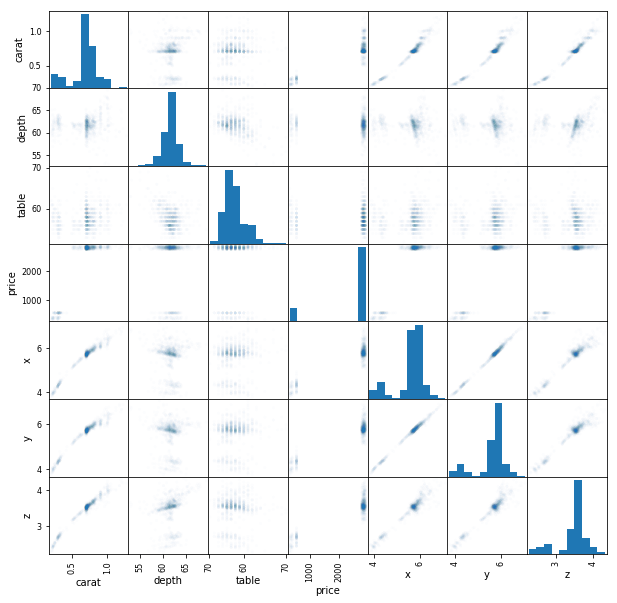

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(data.head(1000), alpha = .01, figsize = (10, 10))
pass

Построим таблицу, описывающую попарную корреляцию между признаками и исследуемым параметром (price).

In [19]:
data.corr()

carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000

In [20]:
corrs = data.corr().abs()
np.fill_diagonal(corrs.values, -2)
corrs.max()

carat    0.975094
depth    0.295779
table    0.295779
price    0.921591
x        0.975094
y        0.974701
z        0.970772
dtype: float64

Видим, что наиболее сильная зависимость есть между параметрами "price" и "carat", "carat" и "x", "y", "z", и "x","y","z" и "price. Построим графики зависимостей.

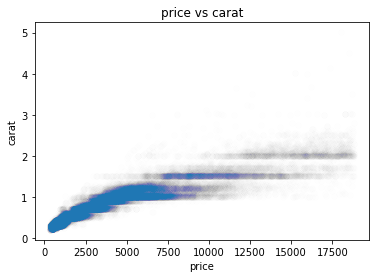

In [21]:
plt.plot(data['price'], data['carat'], 'o', alpha = 0.005)
plt.xlabel('price')
plt.ylabel('carat')
plt.title('price vs carat')
pass

Из графика видно, что чем меньше карат, тем меньше и цена, что подтверждает предыдущее утверждение. 
Строить график с "x" , "y", "z" я не считаю полезным, так как у них прямая корреляция с каратом, и очевидно график получится аналогичный, чем больше размеры бриллианта, тем он дороже стоит.

In [22]:
k = 0
for p in data["price"]:
    if p < 200:
        k = k+1
print(k, k / data["price"].count())

0 0.0


Как видим, бриллиантов с ценой < 200 долларов в выборке нет вообще, на годовую степендию в магистратуре бриллант не купишь :) 

Из интереса построим график с учетом цен до 1000 и после и корреляции между каратом и размером столешницы.

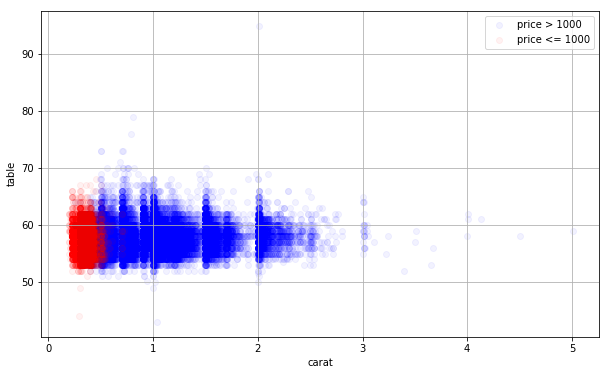

In [23]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['price'] > 1000]['carat'],
            data[data['price'] > 1000]['table'],
            alpha = 0.05,
            label = 'price > 1000',
            color = 'b')

plt.scatter(data[data['price'] <= 1000]['carat'],
            data[data['price'] <= 1000]['table'],
            alpha = 0.05,
            label = 'price <= 1000',
            color = 'r')

plt.xlabel('carat')
plt.ylabel('table')
plt.legend()
plt.grid()

Видим, что бриллиантом с ценами <=1000 весьма мало в выборке, а между каратом и столешницей корреляции практически нет, как это было видно из таблицы корреляции. Караты растут а столешницы все те же :)

In [24]:
data.describe(include = ['object'])

cut  color clarity
count   53940  53940   53940
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13065

In [25]:
data.describe(include = 'all')

carat    cut  color clarity         depth         table  \
count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13065           NaN           NaN   
mean        0.797940    NaN    NaN     NaN     61.749405     57.457184   
std         0.474011    NaN    NaN     NaN      1.432621      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price             x             y             z  
count   53940.000000  53940.000000  53940.000000  53940.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     3932.799722      5.731157      5.734526      3.538734  
std      3989.439738      1.121761      1.142135      0.705699  
min       326.000000      0.000000      0.000000      0.000000  
25%       950.000000      4.710000      4.720000      2.910000  
50%      2401.000000      5.700000      5.710000      3.530000  
75%      5324.250000      6.540000      6.540000      4.040000  
max     18823.000000     10.740000     58.900000     31.800000

In [26]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [27]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [28]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)

# Задача

# Готовим данные

Снизим разброс значений по цене до девяти значений, как мы видели из диаграммы цен разброс достаточно большой, лучше объединить их в общие категории.

In [4]:
data.loc[data['price'] <= 500, 'price'] = 500
data.loc[(data['price'] <= 1000) & (data['price'] > 500), 'price'] = 1000
data.loc[(data['price'] <= 2000) & (data['price'] > 1000), 'price'] = 2000
data.loc[(data['price'] <= 3000) & (data['price'] > 2000), 'price'] = 3000
data.loc[(data['price'] <= 4000) & (data['price'] > 3000), 'price'] = 4000
data.loc[(data['price'] <= 5000) & (data['price'] > 4000), 'price'] = 5000
data.loc[(data['price'] <= 7500) & (data['price'] > 5000), 'price'] = 7500
data.loc[(data['price'] <= 10000) & (data['price'] > 7500), 'price'] = 10000
data.loc[data['price'] > 10000, 'price'] = 15000

Убедимся, что все применилось корректно.

In [62]:
data

carat        cut color clarity  depth  table  price     x     y     z
1       0.23      Ideal     E     SI2   61.5   55.0    500  3.95  3.98  2.43
2       0.21    Premium     E     SI1   59.8   61.0    500  3.89  3.84  2.31
3       0.23       Good     E     VS1   56.9   65.0    500  4.05  4.07  2.31
4       0.29    Premium     I     VS2   62.4   58.0    500  4.20  4.23  2.63
5       0.31       Good     J     SI2   63.3   58.0    500  4.34  4.35  2.75
6       0.24  Very Good     J    VVS2   62.8   57.0    500  3.94  3.96  2.48
7       0.24  Very Good     I    VVS1   62.3   57.0    500  3.95  3.98  2.47
8       0.26  Very Good     H     SI1   61.9   55.0    500  4.07  4.11  2.53
9       0.22       Fair     E     VS2   65.1   61.0    500  3.87  3.78  2.49
10      0.23  Very Good     H     VS1   59.4   61.0    500  4.00  4.05  2.39
11      0.30       Good     J     SI1   64.0   55.0    500  4.25  4.28  2.73
12      0.23      Ideal     J     VS1   62.8   56.0    500  3.93  3.90  2.46
13      0.22    Premium     F     SI1   60.4   61.0    500  3.88  3.84  2.33
14      0.31      Ideal     J     SI2   62.2   54.0    500  4.35  4.37  2.71
15      0.20    Premium     E     SI2   60.2   62.0    500  3.79  3.75  2.27
16      0.32    Premium     E      I1   60.9   58.0    500  4.38  4.42  2.68
17      0.30      Ideal     I     SI2   62.0   54.0    500  4.31  4.34  2.68
18      0.30       Good     J     SI1   63.4   54.0    500  4.23  4.29  2.70
19      0.30       Good     J     SI1   63.8   56.0    500  4.23  4.26  2.71
20      0.30  Very Good     J     SI1   62.7   59.0    500  4.21  4.27  2.66
21      0.30       Good     I     SI2   63.3   56.0    500  4.26  4.30  2.71
22      0.23  Very Good     E     VS2   63.8   55.0    500  3.85  3.92  2.48
23      0.23  Very Good     H     VS1   61.0   57.0    500  3.94  3.96  2.41
24      0.31  Very Good     J     SI1   59.4   62.0    500  4.39  4.43  2.62
25      0.31  Very Good     J     SI1   58.1   62.0    500  4.44  4.47  2.59
26      0.23  Very Good     G    VVS2   60.4   58.0    500  3.97  4.01  2.41
27      0.24    Premium     I     VS1   62.5   57.0    500  3.97  3.94  2.47
28      0.30  Very Good     J     VS2   62.2   57.0    500  4.28  4.30  2.67
29      0.23  Very Good     D     VS2   60.5   61.0    500  3.96  3.97  2.40
30      0.23  Very Good     F     VS1   60.9   57.0    500  3.96  3.99  2.42
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53911   0.70    Premium     E     SI1   60.5   58.0   3000  5.74  5.77  3.48
53912   0.57    Premium     E      IF   59.8   60.0   3000  5.43  5.38  3.23
53913   0.61    Premium     F    VVS1   61.8   59.0   3000  5.48  5.40  3.36
53914   0.80       Good     G     VS2   64.2   58.0   3000  5.84  5.81  3.74
53915   0.84       Good     I     VS1   63.7   59.0   3000  5.94  5.90  3.77
53916   0.77      Ideal     E     SI2   62.1   56.0   3000  5.84  5.86  3.63
53917   0.74       Good     D     SI1   63.1   59.0   3000  5.71  5.74  3.61
53918   0.90  Very Good     J     SI1   63.2   60.0   3000  6.12  6.09  3.86
53919   0.76    Premium     I     VS1   59.3   62.0   3000  5.93  5.85  3.49
53920   0.76      Ideal     I    VVS1   62.2   55.0   3000  5.89  5.87  3.66
53921   0.70  Very Good     E     VS2   62.4   60.0   3000  5.57  5.61  3.49
53922   0.70  Very Good     E     VS2   62.8   60.0   3000  5.59  5.65  3.53
53923   0.70  Very Good     D     VS1   63.1   59.0   3000  5.67  5.58  3.55
53924   0.73      Ideal     I     VS2   61.3   56.0   3000  5.80  5.84  3.57
53925   0.73      Ideal     I     VS2   61.6   55.0   3000  5.82  5.84  3.59
53926   0.79      Ideal     I     SI1   61.6   56.0   3000  5.95  5.97  3.67
53927   0.71      Ideal     E     SI1   61.9   56.0   3000  5.71  5.73  3.54
53928   0.79       Good     F     SI1   58.1   59.0   3000  6.06  6.13  3.54
53929   0.79    Premium     E     SI2   61.4   58.0   3000  6.03  5.96  3.68
53930   0.71      Ideal     G     VS1   61.4   56.0   3000  5.76  5.73  3.53
539

Выделим категориальные столбцы (не числовые), числовые, и отдельно исследуемые столбцы. В которые попадет только столбец price.

In [5]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object' and c != 'price']
research_columns= ['price']
print(categorical_columns)
print(numerical_columns)
print(research_columns)

['cut', 'color', 'clarity']
['carat', 'depth', 'table', 'x', 'y', 'z']
['price']


Выведем все уникальные значения для категориальных столбцов.

In [6]:
for c in categorical_columns:
    print(c, data[c].unique())

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


# Обрабатываем пропущенные значения

In [7]:
data[numerical_columns].count(axis = 0)

carat    53940
depth    53940
table    53940
x        53940
y        53940
z        53940
dtype: int64

In [8]:
data[categorical_columns].count(axis = 0)

cut        53940
color      53940
clarity    53940
dtype: int64

In [9]:
data[research_columns].count(axis = 0)

price    53940
dtype: int64

Как видно во всех столбцах значений 53940, а это ровно столько сколько строк в используемом датасете, значит заполнять пропущенные значения не надо.

In [10]:
data.describe(include = 'all')

carat    cut  color clarity         depth         table  \
count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13065           NaN           NaN   
mean        0.797940    NaN    NaN     NaN     61.749405     57.457184   
std         0.474011    NaN    NaN     NaN      1.432621      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price             x             y             z  
count   53940.000000  53940.000000  53940.000000  53940.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     4617.120875      5.731157      5.734526      3.538734  
std      4281.075546      1.121761      1.142135      0.705699  
min       500.000000      0.000000      0.000000      0.000000  
25%      1000.000000      4.710000      4.720000      2.910000  
50%      3000.000000      5.700000      5.710000      3.530000  
75%      7500.000000      6.540000      6.540000      4.040000  
max     15000.000000     10.740000     58.900000     31.800000

In [11]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

# Векторизация

Векторизация необходима так как некотоыре признаки не являются числовыми и не могут быть использованы при исследовании. 

In [12]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['cut', 'color', 'clarity']


Не бинарных столбцов нет, все не бинарные переводим с помощью встроенной функции в числовые столбцы со значениями (1,0) строящимися по принципу признак + _ + возможное стринговое значение.

In [13]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')


Как видно из аутпута мы создали столько новых столбцов сколько было возможных значений для не числовых  столбцов. 

# Нормализация количественных признаков

Теперь нормализуем числовые характеристики:

In [14]:
data_numerical = data[numerical_columns]
data_numerical.describe()

carat         depth         table             x             y  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184      5.731157      5.734526   
std        0.474011      1.432621      2.234491      1.121761      1.142135   
min        0.200000     43.000000     43.000000      0.000000      0.000000   
25%        0.400000     61.000000     56.000000      4.710000      4.720000   
50%        0.700000     61.800000     57.000000      5.700000      5.710000   
75%        1.040000     62.500000     59.000000      6.540000      6.540000   
max        5.010000     79.000000     95.000000     10.740000     58.900000   

                  z  
count  53940.000000  
mean       3.538734  
std        0.705699  
min        0.000000  
25%        2.910000  
50%        3.530000  
75%        4.040000  
max       31.800000

In [15]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [16]:
data_numerical.describe()

carat         depth         table             x             y  \
count  5.394000e+04  5.394000e+04  5.394000e+04  5.394000e+04  5.394000e+04   
mean   3.774170e-14  5.528923e-13 -3.621533e-14  1.177763e-13  8.638663e-14   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.261446e+00 -1.308748e+01 -6.470013e+00 -5.109073e+00 -5.020884e+00   
25%   -8.395154e-01 -5.231005e-01 -6.521325e-01 -9.103164e-01 -8.882717e-01   
50%   -2.066190e-01  3.531645e-02 -2.046032e-01 -2.777527e-02 -2.147379e-02   
75%    5.106635e-01  5.239313e-01  6.904554e-01  7.210475e-01  7.052356e-01   
max    8.885992e+00  1.204128e+01  1.680151e+01  4.465161e+00  4.654922e+01   

                  z  
count  5.394000e+04  
mean  -2.522116e-13  
std    1.000000e+00  
min   -5.014510e+00  
25%   -8.909378e-01  
50%   -1.237607e-02  
75%    7.103118e-01  
max    4.004720e+01

Как видно из аутпута характеристики нормализовались. 

Объединим все полученные столбцы в одну таблицу:

In [17]:
data = pd.concat((data_numerical, data_nonbinary, data[research_columns]), axis = 1)
print(data.shape)
#print data.columns

(53940, 27)


In [18]:
data.describe()

carat         depth         table             x             y  \
count  5.394000e+04  5.394000e+04  5.394000e+04  5.394000e+04  5.394000e+04   
mean   3.774170e-14  5.528923e-13 -3.621533e-14  1.177763e-13  8.638663e-14   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.261446e+00 -1.308748e+01 -6.470013e+00 -5.109073e+00 -5.020884e+00   
25%   -8.395154e-01 -5.231005e-01 -6.521325e-01 -9.103164e-01 -8.882717e-01   
50%   -2.066190e-01  3.531645e-02 -2.046032e-01 -2.777527e-02 -2.147379e-02   
75%    5.106635e-01  5.239313e-01  6.904554e-01  7.210475e-01  7.052356e-01   
max    8.885992e+00  1.204128e+01  1.680151e+01  4.465161e+00  4.654922e+01   

                  z      cut_Fair      cut_Good     cut_Ideal   cut_Premium  \
count  5.394000e+04  53940.000000  53940.000000  53940.000000  53940.000000   
mean  -2.522116e-13      0.029848      0.090953      0.399537      0.255673   
std    1.000000e+00      0.170169      0.287545      0.489808      0.436243   
min   -5.014510e+00      0.000000      0.000000      0.000000      0.000000   
25%   -8.909378e-01      0.000000      0.000000      0.000000      0.000000   
50%   -1.237607e-02      0.000000      0.000000      0.000000      0.000000   
75%    7.103118e-01      0.000000      0.000000      1.000000      1.000000   
max    4.004720e+01      1.000000      1.000000      1.000000      1.000000   

           ...            color_J    clarity_I1    clarity_IF   clarity_SI1  \
count      ...       53940.000000  53940.000000  53940.000000  53940.000000   
mean       ...           0.052058      0.013737      0.033185      0.242214   
std        ...           0.222146      0.116400      0.179121      0.428427   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           0.000000      0.000000      0.000000      0.000000   
75%        ...           0.000000      0.000000      0.000000      0.000000   
max        ...           1.000000      1.000000      1.000000      1.000000   

        clarity_SI2   clarity_VS1   clarity_VS2  clarity_VVS1  clarity_VVS2  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.170449      0.151483      0.227253      0.067760      0.093919   
std        0.376030      0.358522      0.419061      0.251337      0.291719   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              price  
count  53940.000000  
mean    4617.120875  
std     4281.075546  
min      500.000000  
25%     1000.000000  
50%     3000.000000  
75%     7500.000000  
max    15000.000000  

[8 rows x 27 columns]

# X и y

Отбрасываем столбец price, так как будем его предсказывать:

In [20]:
X = data.drop(('price'), axis = 1)
y = data['price']
feature_names = X.columns

In [21]:
type(feature_names)

pandas.core.indexes.base.Index

In [22]:
feature_names

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [17]:
print(X.shape)
print(y.shape)
N, d = X.shape

(53940, 26)
(53940,)


In [94]:
type(X)

pandas.core.frame.DataFrame

In [95]:
type(y)

pandas.core.series.Series

Разобьём исходный датасет на две части в соотношении 30/70 - тестовую и обучающую выборки.

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

37758 16182


In [97]:
print((N_train + N_test) == data.count())

carat            True
depth            True
table            True
x                True
y                True
z                True
cut_Fair         True
cut_Good         True
cut_Ideal        True
cut_Premium      True
cut_Very Good    True
color_D          True
color_E          True
color_F          True
color_G          True
color_H          True
color_I          True
color_J          True
clarity_I1       True
clarity_IF       True
clarity_SI1      True
clarity_SI2      True
clarity_VS1      True
clarity_VS2      True
clarity_VVS1     True
clarity_VVS2     True
price            True
dtype: bool


# NN

Произведём обучение классификатора и выполним классификацию при этом варьируя число соседей в методе от 1 до 15: 1, 3, 5, 10, 15. Посчитаем ошибки двумя способами, построим матрицу ошибок (confusion matrix) для каждого случая. (Матрица ошибок - это такая матрица M, размер которой определяется количеством различных классов, а элемент M[i,j] - число объектов, которые относятся к классу i, но классификатор отнес их к классу j. Даёт наглядное представление о результате работы классификатора). Как-то специально классификатор мы настривать не будем, и будем использовать значения по умолчанию:

In [456]:
from sklearn.neighbors import KNeighborsClassifier

print(KNeighborsClassifier(n_neighbors = 10))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


Опишем, что значат эти параметры:

* algorithm = auto. Это означает, что подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки. А вообще бывают следующие способы:"brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем — расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей.
* leaf_size=30. Здесь мы выбрали порог переключения на полный перебор равным 30 (в случае выбора BallTree или KDTree для нахождения соседей).
* metric='minkowski'. Для нахождения расстояния между соседями будет использоваться метрика Минковского. При использовании большинства метрик признаки нужно масштабировать (что мы и сделали ранее в подготовке данных для kNN).
* n_neighbors=10. Число соседей. Здесь оно задаётся равным 10 (просто для примера).
weights='uniform'. Это означает, что веса всех соседей равны, а не обратно пропорциональны расстоянию, например (если бы мы выбрали "distance").

In [457]:
# зададим количество соседей равным 1, 3, 5, 10, 15
for n in [1, 3, 5, 10, 15]:
    # обучение классификатора при заданном n
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    # само предсказание
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)

    err_train = np.mean(y_train != y_train_predict)
    err_test  = np.mean(y_test  != y_test_predict)
    
    # выведем ошибку при текущем n двумя способами
    print("Количество соседей: ", n)
    print("Ошибка на обучающей выборке: ", err_train, 1 - knn.score(X_train, y_train))
    print("Ошибка на тестовой выборке: ", err_test, 1 - knn.score(X_test, y_test))
    # построим confusion matrix 
    print("Матрица ошибок (confusion matrix): \n", confusion_matrix(y_test, y_test_predict))
    print("\n ----------------------------- \n")

Количество соседей:  1
Ошибка на обучающей выборке:  0.00037078235076 0.00037078235076
Ошибка на тестовой выборке:  0.257446545544 0.257446545544
Матрица ошибок (confusion matrix): 
 [[ 310  216    3    0    0    0    0    0    0]
 [ 202 3322  381    1    0    0    0    0    0]
 [   2  373 2216  228    7    3    0    0    0]
 [   0    3  237 1325  253   34    5    0    3]
 [   0    1   12  238  729  306   40    2    0]
 [   0    0    0   23  219  836  311    5    1]
 [   0    0    1    5   36  291 1371  155   21]
 [   0    0    0    0    2    5  182  588  144]
 [   0    0    0    0    2    3   25  185 1319]]

 ----------------------------- 

Количество соседей:  3
Ошибка на обучающей выборке:  0.133375708459 0.133375708459
Ошибка на тестовой выборке:  0.258620689655 0.258620689655
Матрица ошибок (confusion matrix): 
 [[ 299  228    2    0    0    0    0    0    0]
 [ 173 3425  307    1    0    0    0    0    0]
 [   2  399 2238  184    6    0    0    0    0]
 [   0    8  298 1319  209 

Как видим, наименьшая ошибка у нас получается в случае пяти соседей - 25.6%, в целом ошибка не сильно меняется от колчиества соседей, только на десятые процента, чуть больше она возросла на 15 соседей на 1% (26.6% ошибки). Произведём подбор параметров (в данном случае это количество соседей) и проверим, в самом ли деле наилучшим образом работает вариант метода ближайших соседей с пятью соседями.

# Подбор параметров

Исходя из предыдущего запуска от 1 до 15: 1, 3, 5, 10, 15 и полученных результатов (худшая оценка на 15 соседях, лучшая на 5 и 1, предположительно, нужно искать в 1 - 9 диапазоне оптимальное количество соседей)

In [463]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 9]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.262116637534 5


In [464]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.166242915409 0.256334198492


Победителем вышел алгоритм 5NN. Ошибка на обучающей выборке, очевидно, близка к нулю, а на тестовой 25.6%. Необходимо изучать другие методы машинного обучения для улучшения результата. 

# 2 задание (MLP)

## Разбиваем данные на обучающую и тестовую выборки

Разделим входные данные на обучающюу и тестовую выборки

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Обучаем классификатор

Создадим классификатор с одним скрытым слоем размерностью 10 и активационной функцией logistic

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
perc = MLPClassifier(hidden_layer_sizes=(10,))
perc.activation='logistic'
perc.max_iter=10000000

Обучим классификатор, получены значения y_pred для проверки на тестовой выборке

In [25]:
perc=perc.fit(x_train, y_train)

In [26]:
y_pred = perc.predict(x_test)

# Проверяем качество классификатора

Выведем тестовую выборку y

In [147]:
print(y_test)

5851      4000
27781     1000
14262     7500
8698      5000
27897     1000
37580     1000
52663     3000
23360      500
29432     1000
47279     2000
44806     2000
8740      5000
50286     1000
41617     1000
41777     2000
46484     2000
47325     1000
17204     7500
26942    15000
33131     1000
46529     2000
3117      4000
34640     1000
29154     1000
4123      4000
6486      5000
44413     2000
40542     2000
16458     7500
6752      5000
         ...  
24731    15000
30461     1000
25658    15000
32753     1000
32171     1000
37749     1000
42127     2000
45856     2000
3189      4000
18063     7500
40958     2000
12629     7500
9087      5000
44346     2000
53289     1000
1399      1000
5363      4000
31072     1000
4122      4000
39271      500
48581     2000
9785      5000
13340     7500
2368      4000
45797     2000
23479    15000
20392     1000
10936     5000
52194     3000
35294      500
Name: price, Length: 10788, dtype: int64


Выведем выборку с предсказанием. А также создадим дополнительную сущность, показывающую результат предсказания цены на бриллиант нейронной сетью.

In [148]:
print(y_pred)
yy = []
yy.append(y_pred==y_test)

[ 4000  1000 10000 ...,  5000  3000   500]


Выведем результат предсказания цены нейронной сетью. 

In [149]:
print(yy)
print(1 - perc.score(x_test, y_test))

[5851      True
27781     True
14262    False
8698      True
27897     True
37580     True
52663     True
23360    False
29432     True
47279    False
44806     True
8740     False
50286     True
41617     True
41777     True
46484     True
47325     True
17204     True
26942     True
33131     True
46529     True
3117      True
34640     True
29154     True
4123      True
6486      True
44413     True
40542     True
16458     True
6752      True
         ...  
24731     True
30461     True
25658     True
32753     True
32171     True
37749    False
42127     True
45856     True
3189      True
18063    False
40958     True
12629    False
9087      True
44346     True
53289     True
1399      True
5363      True
31072     True
4122      True
39271     True
48581     True
9785     False
13340     True
2368      True
45797     True
23479     True
20392     True
10936     True
52194     True
35294     True
Name: price, Length: 10788, dtype: bool]
0.17176492399


Как видно из результата ошибка составила 17%, записей в тестовой выборке было 10788.

Выведем марицу неточностей(confusion matrix)

In [136]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[ 247   58    0    1    0    0    1    0    0]
 [ 105 2362  195    0    0    0    0    0    0]
 [   1   99 1599  100    0    0    0    0    0]
 [   0    0   78 1047   88    0    0    0    0]
 [   0    0    0  116  597  104    1    0    0]
 [   0    0    0    3  130  691  134    0    0]
 [   0    0    0    0    2  142 1087   64    1]
 [   0    0    0    0    0    0  106  481   67]
 [   0    0    0    1    0    0    0   70 1010]]


Как видно из матрицы диагональные элементы явно выражены, значит в целом классификатор определяет решения верно.

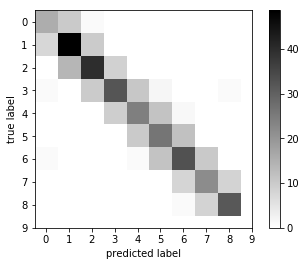

In [137]:
M = confusion_matrix(y_test, y_pred)
#M = M - np.diag(np.diag(M))
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.grid(False)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()

Как видно из рисунка отображающего матрицу неточностей, проблемы с предсказанием цены очевидно присутствуют, в особенности часто классификатор выбирает соседнии с истинным значением. Но иногда бывают и значительные отклонения, на графике виднеются светло серые квадраты ошибочных значений далеко за пределами диагонали.

# Подбор гиперпараметров

Теперь попробуем классификатор с большим числом параметров

In [140]:
perc = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [141]:
perc=perc.fit(x_train, y_train)
y_pred = perc.predict(x_test)
yy = []
yy.append(y_pred==y_test)
print(yy)
print(1 - perc.score(x_test, y_test))

[5851      True
27781     True
14262     True
8698      True
27897     True
37580    False
52663     True
23360     True
29432     True
47279     True
44806     True
8740     False
50286     True
41617     True
41777     True
46484     True
47325    False
17204     True
26942     True
33131     True
46529     True
3117      True
34640     True
29154     True
4123      True
6486      True
44413     True
40542     True
16458     True
6752      True
         ...  
24731     True
30461     True
25658     True
32753     True
32171     True
37749    False
42127     True
45856     True
3189      True
18063     True
40958     True
12629    False
9087      True
44346     True
53289     True
1399      True
5363      True
31072     True
4122      True
39271     True
48581     True
9785     False
13340     True
2368      True
45797     True
23479     True
20392     True
10936     True
52194    False
35294     True
Name: price, Length: 10788, dtype: bool]
0.156655543196


Как видно из инпута ошибка незначительно уменьшилась и теперь составляет 15,6% вместо 17%

Подберем оптимальное значение параметра регуляризации alpha

In [152]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    perc = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    perc.fit(x_train, y_train)

    y_train_pred = perc.predict(x_train)
    y_test_pred = perc.predict(x_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

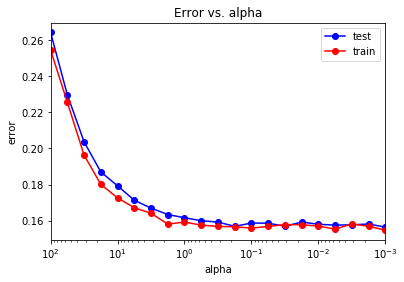

In [153]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Ошибка на тренировочной выборке и на тестовой практически одинаковая.
Переобучение на таких данных невозможно. Недообучение возможно, так как ошибка все же падает с уменьшением alpha.

Выведем минимальное значение ошибки:

In [154]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.156331108639 0.154708935855


Выведем оптимальное значение alpha:

In [155]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[ 0.001]


In [156]:
alpha_opt = alpha_opt[0]

## Классификатор при найденном оптимальном значении alpha:

Повторим обучение:

In [158]:
perc = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
perc.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.156331108639
0.154708935855


## Матрица рассогласования:

In [159]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[ 251   70    0    0    0    0    0    0    0]
 [ 101 2356  191    1    0    0    1    0    0]
 [   1   93 1598   86    0    0    0    0    0]
 [   0    0   83 1075  102    0    0    0    0]
 [   0    0    0  103  572   94    2    0    0]
 [   0    0    0    3  139  687  127    0    0]
 [   0    0    0    0    4  156 1110   80    1]
 [   0    0    0    0    0    0   88  460   67]
 [   0    0    0    0    0    0    1   75 1010]]


Как видно из матрицы диагональные элементы явно выражены, значит в целом классификатор определяет решения верно. 
Результат немного улучшается в лучшую сторону по сравнению с прошлой матрицей рассогласования, выведенной при использовании не оптимального альфа значения у прошлого классификатора. Но все еще ошибка классификатора между соседними значениями цены существена.

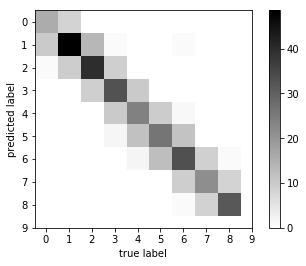

In [160]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

По сравнению с предыдущей матрицей рассогласования количество квадратов далеких от диагональных значений уменьшилось с использованием нового классификатора. Но все еще осталась проблема распознования соседних цен, диагональ ярко выражена, но также довольно выражены соседнми + одно или - одно значения цены справа и слева от диагонали. Возможно для моей задачи данный алгоритм оптимальным не является.

## Другие метрики качества:

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

        500       0.78      0.71      0.74       353
       1000       0.89      0.94      0.91      2519
       2000       0.90      0.85      0.88      1872
       3000       0.85      0.85      0.85      1268
       4000       0.74      0.70      0.72       817
       5000       0.72      0.73      0.73       937
       7500       0.82      0.84      0.83      1329
      10000       0.75      0.75      0.75       615
      15000       0.93      0.94      0.93      1078

avg / total       0.84      0.85      0.84     10788



${\rm error} = \frac{{\rm FP} + {\rm FN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}}$
${\rm accuracy} = \frac{{\rm TP} + {\rm TN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}} = 1 - {\rm error}$
${\rm precision} = \frac{{\rm TP}}{{\rm FP}+{\rm TP}}$
$F_1 = 2\cdot\frac{{\rm precision}\cdot{\rm recall}}{{\rm precision}+{\rm recall}}$

Как видно из таблицы наибольшая точность достигается на 15000 цене (93%), наименьшая на 5000(72%).
Наибольшая доля найденных положительных объектов из всех положительных объектов достигается на 15000 и 1000 ценах(94%). наименьшая на 4000(70%).
Следовательно и агрегированная оценка f1-score складываемая из precision recall оценок, наилучшая у значения 15000(93%) и наихудшая у значения 4000(72%)

## Размер слоя

Посмотрим зависимость ошибки от количества нейронов (Так как мой датасет довольно объемный я взяла для этого графика только первые 5000 строк, когда я взяла все, это привело к Memory Error на компьютере спустя час работы)

In [68]:
size_arr = (1, 2, 10, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 700, 1000)
test_err = []
train_err = []
for size in size_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (int(size),), solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(x_train.head(5000), y_train.head(5000))

    y_train_pred = mlp_model.predict(x_train.head(5000))
    y_test_pred = mlp_model.predict(x_test.head(5000))
    train_err.append(np.mean(y_train.head(5000) != y_train_pred))
    test_err.append(np.mean(y_test.head(5000) != y_test_pred))

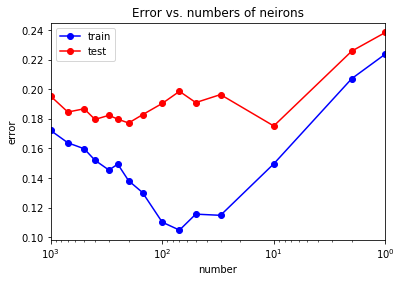

In [69]:
plt.semilogx(size_arr, train_err, 'b-o', label = 'train')
plt.semilogx(size_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(size_arr), np.min(size_arr)])
plt.title('Error vs. numbers of neirons')
plt.xlabel('number')
plt.ylabel('error')
plt.legend()
pass

При размере слоя около 85 наблюдается наибольшее переобучение. Ошибки для тестовой выборки колеблются от 18% до 24%

# 3 задание (TREES)

## Random forest

Разделим входные данные на обучающую и тестовую выборки

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Обучаем классификатор вида Random Forest. Число деревьев = 4

In [71]:
from sklearn import ensemble
rf_model = ensemble.RandomForestClassifier(n_estimators = 4)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Посчитаем и выведем ошибку на обучающей выборке

In [72]:
err_train = np.mean(y_train != rf_model.predict(X_train))
print(err_train)

0.0373165951586


Посчитаем и выведем ошибку на тестовой выборке

In [73]:
err_test  = np.mean(y_test  != rf_model.predict(X_test))
print(err_test)

0.193486590038


На обучающей выборке ошибка составила 3,7%, что пока что самый лучший достигнутый результат из всех алгоритмов, но радоваться тут нечему, так как на тестовой выборке ошибка составила 19,3% что в целом не плохой результат, относительно ошибок полученных алгоритмами выше.

Так как ошибка на обучающей выборке существо меньше, чем на тестовой, наблюдается переобучение.

Посмотрим зависимость ошибки от количества деревьев(Так как мой датасет довольно объемный я взяла для этого графика только первые 5000 строк, когда я взяла все, это привело к Memory Error на компьютере спустя час работы)

In [75]:
from sklearn import ensemble
size_arr = (1, 2, 10, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 700, 1000)
test_err = []
train_err = []
for size in size_arr:
    rf_model = ensemble.RandomForestClassifier(n_estimators = int(size))
    rf_model.fit(X_train.head(5000), y_train.head(5000))

    y_train_pred = rf_model.predict(X_train.head(5000))
    y_test_pred = rf_model.predict(X_test.head(5000))
    train_err.append(np.mean(y_train.head(5000) != y_train_pred))
    test_err.append(np.mean(y_test.head(5000) != y_test_pred))

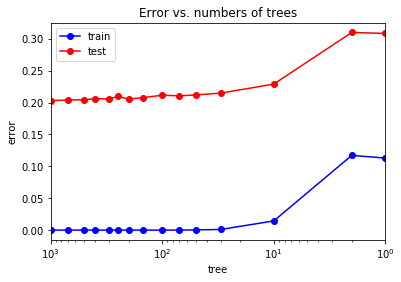

In [76]:
plt.semilogx(size_arr, train_err, 'b-o', label = 'train')
plt.semilogx(size_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(size_arr), np.min(size_arr)])
plt.title('Error vs. numbers of trees')
plt.xlabel('tree')
plt.ylabel('error')
plt.legend()
pass

Найдем минимальное значение ошибки и количество деревьев, на котором оно достигается

In [77]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.2032


In [79]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print(trees_opt)

78


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 15
  """Entry point for launching an IPython kernel.


Из графика следует, что начиная с примерно 50 деревьев явное переобучение, ошибка на обучающей выборке стала равна 0, но ошибка на тестовой выборке так и остается в пределах 20% не улучшаясь. 

## Extremely Random Forests

Обучим классификатор вида Extremely Randomized Trees.

In [80]:
ert_model = ensemble.ExtraTreesClassifier(n_estimators = 1)
ert_model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

Посчитаем и выведем ошибку на обучающей выборке

In [110]:
err_train = np.mean(y_train != ert_model.predict(X_train))
print(err_train)

0.178054981726


Посчитаем и выведем ошибку на тестовой выборке

In [111]:
err_test  = np.mean(y_test  != ert_model.predict(X_test))
print(err_test)

0.204486466444


На данном дереве наблюдается эффект легкого переобучения, как мы видим на тестовой выборке результат хуже, чем на обучающей, но не так сильно отличается, чтобы можно было говорить о серьезном переобучении. В целом, ошибка на тестовой выборке составила 20% что на почти 1% хуже предыдущего результата.

Посмотрим зависимость ошибки от количества деревьев(Так как мой датасет довольно объемный я взяла для этого графика только первые 5000 строк, когда я взяла все, это привело к Memory Error на компьютере спустя час работы)

In [98]:
size_arr = (1, 2, 10, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 700, 1000)
test_err = []
train_err = []
for size in size_arr:
    ert_model = ensemble.ExtraTreesClassifier(n_estimators = int(size))
    ert_model.fit(X_train.head(5000), y_train.head(5000))

    y_train_pred = ert_model.predict(X_train.head(5000))
    y_test_pred = ert_model.predict(X_test.head(5000))
    train_err.append(np.mean(y_train.head(5000) != y_train_pred))
    test_err.append(np.mean(y_test.head(5000) != y_test_pred))

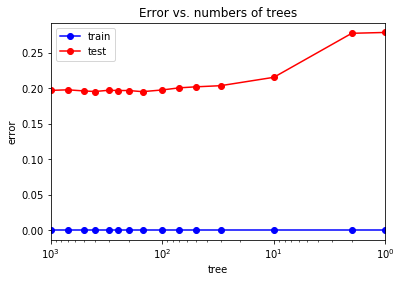

In [99]:
plt.semilogx(size_arr, train_err, 'b-o', label = 'train')
plt.semilogx(size_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(size_arr), np.min(size_arr)])
plt.title('Error vs. numbers of trees')
plt.xlabel('tree')
plt.ylabel('error')
plt.legend()
pass

Найдем минимальное значение ошибки и количество деревьев, на котором оно достигается

In [85]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.1958


In [86]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print(trees_opt)

63


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 15
  """Entry point for launching an IPython kernel.


Из графика следует, что ошибка на обучающей выборке равна 0 сколько бы деревьев не было. Но при этом ошибка на тестовой выборке существенно не меняется прмерно с 30 деревьев и приблизительно равна 20% как и на предыдущем алгоритме. Впрочем лучшее значение ошибки равно 19,5% что немного лучше предыдущего полученного результата.

## Ada Boost Classifier

Обучим классификатор вида AdaBoost

In [87]:
ab_model = ensemble.AdaBoostClassifier(n_estimators = 50)
ab_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

Посчитаем и выведем ошибку на обучающей выборке

In [112]:
err_train = np.mean(y_train != ab_model.predict(X_train))
print(err_train)

0.660654695694


Посчитаем и выведем ошибку на тестовой выборке

In [113]:
err_test  = np.mean(y_test  != ab_model.predict(X_test))
print(err_test)

0.665677913731


На данном дереве не наблюдается эффект переобучения, как мы видим на тестовой выборке результат почти аналогичный обучающей выборке, и ошибка составляет 65-66%, что означает, что классификатор чаще дает неверные ответы по цене бриллианта, чем верные. Это очень плохой результат.

Посмотрим зависимость ошибки от количества деревьев

In [90]:
size_arr = (1, 2, 10, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 700, 1000)
test_err = []
train_err = []
for size in size_arr:
    ada_model = ensemble.AdaBoostClassifier(n_estimators = int(size))
    ada_model.fit(X_train.head(5000), y_train.head(5000))

    y_train_pred = ada_model.predict(X_train.head(5000))
    y_test_pred = ada_model.predict(X_test.head(5000))
    train_err.append(np.mean(y_train.head(5000) != y_train_pred))
    test_err.append(np.mean(y_test.head(5000) != y_test_pred))

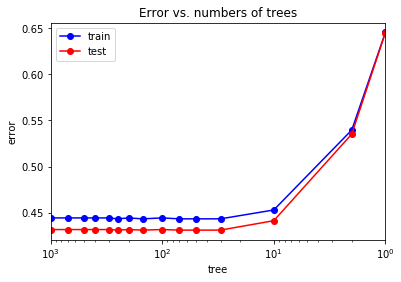

In [91]:
plt.semilogx(size_arr, train_err, 'b-o', label = 'train')
plt.semilogx(size_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(size_arr), np.min(size_arr)])
plt.title('Error vs. numbers of trees')
plt.xlabel('tree')
plt.ylabel('error')
plt.legend()
pass

Найдем минимальное значение ошибки и количество деревьев, на котором оно достигается

In [92]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.4434 0.4312


In [93]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print(trees_opt)

23


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 15
  """Entry point for launching an IPython kernel.


Из графика следует, что ошибка на обучающей выборке примерно равна 44% начиная с 30 деревьев, при меньшем количестве деревьев она возрастает до 65%. Но при этом ошибка на тестовой выборке существенно не меняется прмерно с 30 деревьев и приблизительно равна 43%, что чуть лучше чем на обучающей выборке. Результат в 43% в два раза хуже чем на всех предыдущих алгоритмах. Тут переобучения не наблюдается.

## Gradient Boosting Trees

Обучим классификатор вида Gradient Boosted Trees. Число деревьев = 100

In [114]:
gbt_model = ensemble.GradientBoostingClassifier(n_estimators = 100, max_depth = 2, learning_rate= 0.4)
gbt_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Посчитаем и выведем ошибку на обучающей выборке

In [115]:
err_train = np.mean(y_train != gbt_model.predict(X_train))
print(err_train)

0.157582499073


Посчитаем и выведем ошибку на тестовой выборке

In [116]:
err_test  = np.mean(y_test  != gbt_model.predict(X_test))
print(err_test)

0.176059819553


На данном дереве наблюдается эффект не сильного переобучения, как мы видим на тестовой выборке ошибка составила 17,6%, в то время как на обучающей она составляет 15,7%. Пока лучший из достигнутых алгоритмами результатов.

Посмотрим зависимость ошибки от количества деревьев

In [117]:
size_arr = (1, 2, 10, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 700, 1000)
test_err = []
train_err = []
for size in size_arr:
    gbt_model = ensemble.GradientBoostingClassifier(n_estimators = int(size))
    gbt_model.fit(X_train.head(5000), y_train.head(5000))

    y_train_pred = gbt_model.predict(X_train.head(5000))
    y_test_pred = gbt_model.predict(X_test.head(5000))
    train_err.append(np.mean(y_train.head(5000) != y_train_pred))
    test_err.append(np.mean(y_test.head(5000) != y_test_pred))

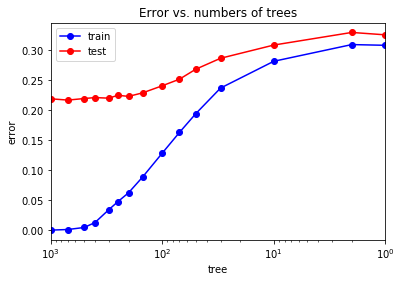

In [118]:
plt.semilogx(size_arr, train_err, 'b-o', label = 'train')
plt.semilogx(size_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(size_arr), np.min(size_arr)])
plt.title('Error vs. numbers of trees')
plt.xlabel('tree')
plt.ylabel('error')
plt.legend()
pass

Найдем минимальное значение ошибки и количество деревьев, на котором оно достигается

In [119]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.2164


In [120]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print(trees_opt)

73


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 15
  """Entry point for launching an IPython kernel.


Из графика следует, что ошибка на тестовой выборке примерно равна 20%  на тестовой выборке начиная с 100 деревьев, ошибка на обучающей выборке стремится к нулю с увеличением числа деревьев до 400 и больше и наблюдается явный эффект переобучения, так как ошибка на обучающей выборке стабильна равна 0, а на тестовой она никак не улучшается. 

# 4 Задание(PCA - Principal Components Analysis)

Исходные данные до использования PCA:

In [23]:
X.shape

(53940, 26)

Как видно из вывода исходные данные содержат 26 столбцов. Попробуем уменьшить размерность до 10.

Разделим входные данные на обучающую и тестовую выборки

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Теперь обучим PCA

In [34]:
from sklearn import decomposition 
pca = decomposition.PCA(n_components = 10)
X_train_reduc = pca.fit_transform(X_train)
X_test_reduc = pca.transform(X_test)

Обучим классификатор вида Gradient Boosted Trees. Число деревьев = 100

In [36]:
from sklearn import ensemble
gbt_model = ensemble.GradientBoostingClassifier(n_estimators = 100, max_depth = 2, learning_rate= 0.4)
gbt_model.fit(X_train_reduc, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Посчитаем и выведем ошибку на обучающей выборке

In [37]:
err_train = np.mean(y_train != gbt_model.predict(X_train_reduc))
print(err_train)

0.234652259124


Посчитаем и выведем ошибку на тестовой выборке

In [38]:
err_test  = np.mean(y_test  != gbt_model.predict(X_test_reduc))
print(err_test)

0.27406995427


Наблюдается эффект переобучения ошибка на обучающей выборке составляет 23%(что все еще не мало), а на тестовой 27%, что больше чем на обучающей на 4%. 

Построим график зависимости ошибок (ошибка на обучающей выборке + ошибка на тестовой выборке) от количества компонент в методе

In [50]:
components_arr = np.arange(1, 27, 1)
test_err = []
train_err = []
oob_err = []
for components in components_arr:
    pca = decomposition.PCA(n_components = components)
    X_pca_train = pca.fit_transform(X_train.head(5000))
    X_pca_test = pca.transform(X_test.head(5000))
    gbt_model = ensemble.GradientBoostingClassifier(n_estimators = 100, max_depth = 2, learning_rate= 0.4)
    gbt_model.fit(X_pca_train, y_train.head(5000))
    train_err.append(np.mean(y_train.head(5000) != gbt_model.predict(X_pca_train)))
    test_err.append(np.mean(y_test.head(5000)  != gbt_model.predict(X_pca_test)))

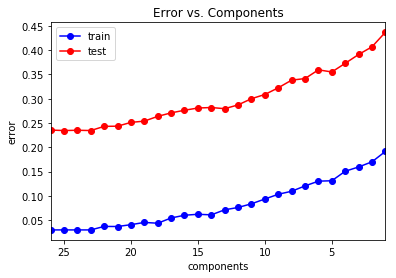

In [51]:
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(components_arr), np.min(components_arr)])
plt.title('Error vs. Components')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

In [52]:
print(components_arr)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26]


Из графика видно что при числе компонент ближе к 20 ошибка падает, далее не существенно колеблясь до 26 максимума компонент, в целом видется корреляция между тестовой ошибкой и обучающей, они одинаково растут и падают в зависимости от количества компонент. 

Найдем минимальное значение ошибки

In [53]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print ('Min error train:', min_train_err)
print ('Min error test:', min_test_err)

Min error train: 0.0298
Min error test: 0.2344


Следовательно можно найти оптимальное количество компонент

In [54]:
components_opt = components_arr[test_err == min_test_err]
components_opt = components_opt[0]
print(components_opt)

23


Оптимальное значение количества компонент 23, на нем достигается минимальное значение ошибки тестовой 23%, а обучающая равна всего 2%, что явное переобучение, но наилучший из возможных результатов. 